# Problem Introduction
 **Understanding Pima Indians Diabetes Database**

Diabetes, a widespread chronic health condition, poses significant health risks and requires timely intervention for effective management. The dataset used in this analysis comprises various health-related features collected from individuals, including glucose levels, blood pressure, BMI, and age. The goal is to develop a machine learning model that accurately predicts the likelihood of diabetes onset based on these features.

# Data Sets Description

- The diabetes dataset contains health-related information collected from patients, designed specifically for predicting the onset of diabetes. It includes various features derived from medical examinations, serving as potential indicators or risk factors associated with diabetes.

- **Included Features:** Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, and Outcome (target variable indicating diabetes presence).

- Model Used : Naive Bayesian, Bayesian Belief Network, Decision Tree, LDA, PCA, K-NN (Different distances), K-fold cross validation.

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [147]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [148]:
df.shape

(768, 9)

In [149]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [150]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [151]:
df= df.copy(deep = True)
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


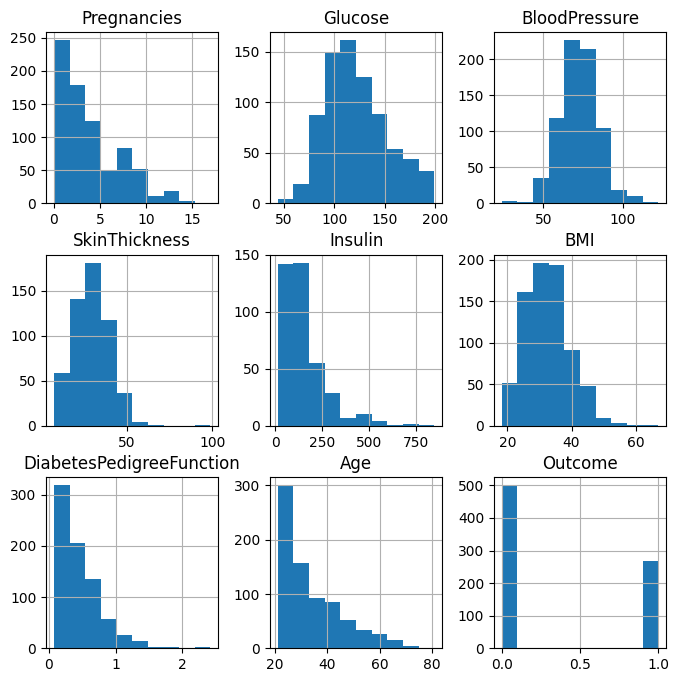

In [152]:
p = df.hist(figsize = (8,8))

In [153]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)

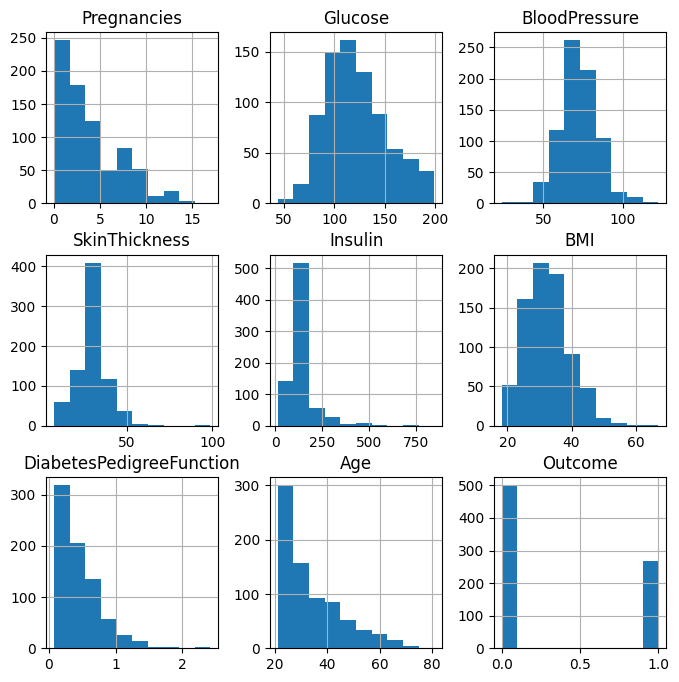

In [154]:
p = df.hist(figsize = (8,8))

In [155]:
print(df.groupby('Outcome').size()) # it shows that 500 has no diabetes and 268 got Diabetes

Outcome
0    500
1    268
dtype: int64


<Axes: >

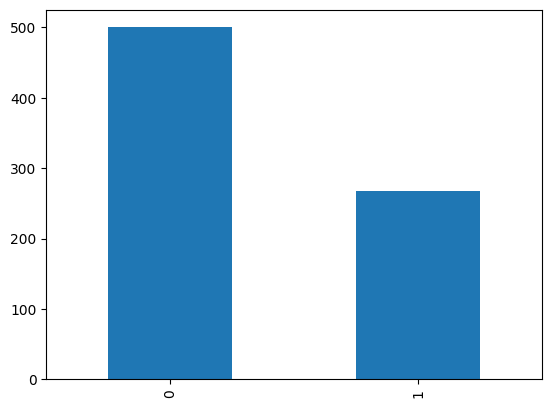

In [156]:
df['Outcome'].value_counts().plot(kind = 'bar')

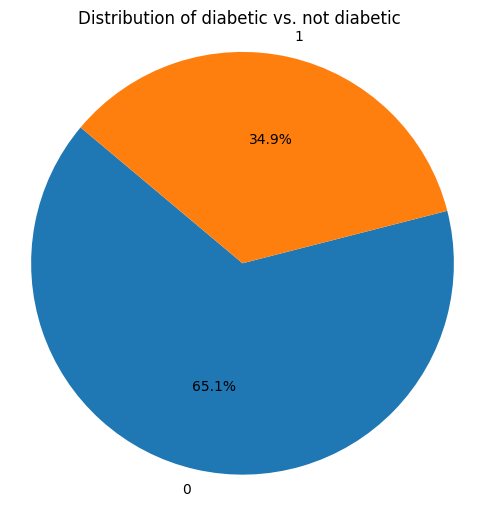

In [157]:
label_column = 'Outcome'
label_counts = df[label_column].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of diabetic vs. not diabetic ')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Data Analysis

In [158]:
column_name = 'Outcome'

print(f" minmum is : {df[column_name].min():.2f}")

print(f" max is : {df[column_name].max():.2f}")

print(f" mean is : {df[column_name].mean():.2f}")

print(f" variance is : {df[column_name].var():.2f}")

print(f" standard deviation  is : {df[column_name].std():.2f}")

print(f" skewness is : {df[column_name].skew():.2f}")

print(f" kurtosis is : {df[column_name].kurtosis():.2f}")

 minmum is : 0.00
 max is : 1.00
 mean is : 0.35
 variance is : 0.23
 standard deviation  is : 0.48
 skewness is : 0.64
 kurtosis is : -1.60


In [159]:
# Calculate the covariance matrix
covariance_matrix = df.cov()

# Display the covariance matrix
print("Covariance Matrix:")
print(covariance_matrix)

Covariance Matrix:
                          Pregnancies      Glucose  BloodPressure  \
Pregnancies                 11.354056    13.118128       8.499282   
Glucose                     13.118128   926.346983      80.394788   
BloodPressure                8.499282    80.394788     146.321591   
SkinThickness                2.422243    51.556791      20.402013   
Insulin                      7.290682  1101.781060      47.112390   
BMI                          0.499439    48.364184      23.385786   
DiabetesPedigreeFunction    -0.037426     1.382151      -0.011075   
Age                         21.570620    95.401356      46.175523   
Outcome                      0.356618     7.155569       0.958140   

                          SkinThickness      Insulin         BMI  \
Pregnancies                    2.422243     7.290682    0.499439   
Glucose                       51.556791  1101.781060   48.364184   
BloodPressure                 20.402013    47.112390   23.385786   
SkinThickness     

In [160]:
# Calculate Correlation Matrix
correlation_matrix = df.corr()
correlation_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231128,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


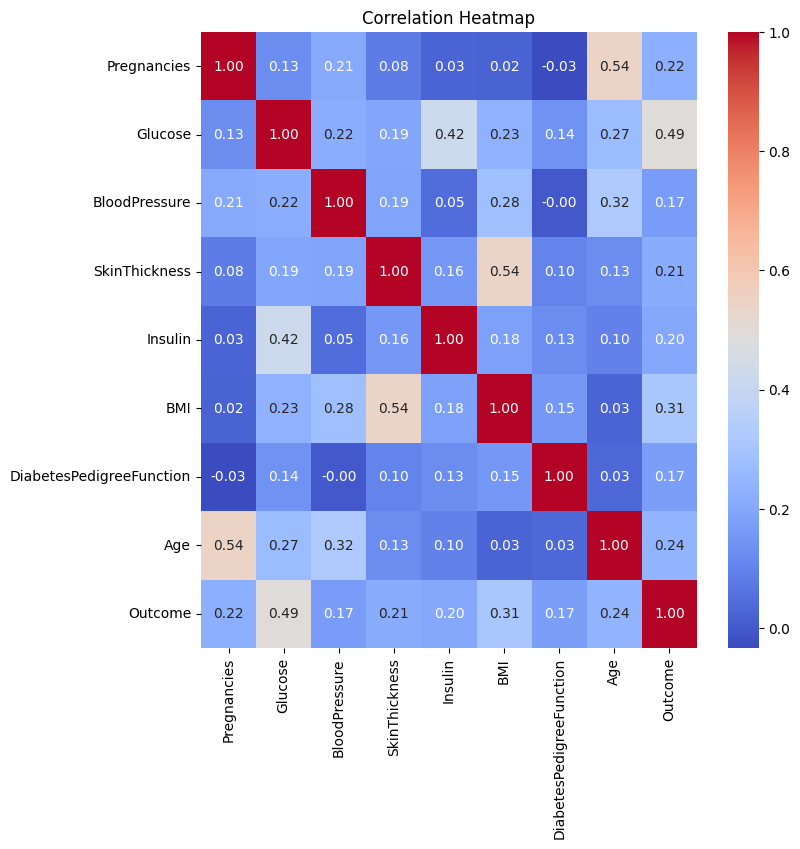

In [161]:
#heap map
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [162]:
#t--test
import pandas as pd
from scipy import stats

column_name = 'BloodPressure'

# Splitting the data into two groups based on the 'Outcome' column
diabetes_group_1 = df[df['Outcome'] == 0][column_name]
diabetes_group_2 = df[df['Outcome'] == 1][column_name]

# Perform independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(diabetes_group_1, diabetes_group_2)

# Print the results
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

t-statistic: -4.661098993631144
p-value: 3.709288185093571e-06


In [163]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - Means are significantly different.")
else:
    print("Fail to reject the null hypothesis - No significant difference in means.")

Reject the null hypothesis - Means are significantly different.


In [164]:
#ANOVA


glucose_diabetic = df[df['Outcome'] == 1]['BMI']
glucose_non_diabetic = df[df['Outcome'] == 0]['BMI']

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(glucose_diabetic, glucose_non_diabetic)

# Print the results
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 82.62927105042671
P-value: 8.336902677506244e-19


In [165]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - Means are significantly different between groups.")
else:
    print("Fail to reject the null hypothesis - No significant difference in means between groups.")


Reject the null hypothesis - Means are significantly different between groups.


# Feature Reduction

In [166]:
# PCA - minimizing the variance.
# step 1 : standralization to avoid baised results
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(df)

In [167]:
# step 2 :computing Eigenvectors and Eigenvalues of cov. matrix.
# Eigenvectors : determine the directions of the new feature space.
# Eigenvalues : determine their magnitude.

X_mean = np.mean(X, axis=0)
# cov_mat = np.cov(X)
cov_mat = (X - X_mean).T.dot((X - X_mean)) / (X.shape[0]-1) # covariance rule
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00130378  0.12807824  0.20879418  0.08187643  0.02508014  0.02158684
  -0.03356638  0.54505093  0.22218746]
 [ 0.12807824  1.00130378  0.21865162  0.19293708  0.4196099   0.23142965
   0.13723841  0.26688102  0.49357034]
 [ 0.20879418  0.21865162  1.00130378  0.19210358  0.04514589  0.2815657
  -0.00276697  0.32501814  0.16629019]
 [ 0.08187643  0.19293708  0.19210358  1.00130378  0.15581316  0.54391329
   0.1023215   0.12627161  0.21515337]
 [ 0.02508014  0.4196099   0.04514589  0.15581316  1.00130378  0.18047613
   0.12666802  0.09722785  0.20405604]
 [ 0.02158684  0.23142965  0.2815657   0.54391329  0.18047613  1.00130378
   0.15363772  0.02563028  0.31244517]
 [-0.03356638  0.13723841 -0.00276697  0.1023215   0.12666802  0.15363772
   1.00130378  0.03360507  0.17407072]
 [ 0.54505093  0.26688102  0.32501814  0.12627161  0.09722785  0.02563028
   0.03360507  1.00130378  0.23866675]
 [ 0.22218746  0.49357034  0.16629019  0.21515337  0.20405604  0.31244517
   0

In [168]:
# step 3 : Eigendecomposition of the correlation matrix.
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.26836612 -0.56877215 -0.03521515 -0.19789935  0.45364332  0.42818139
  -0.15714753 -0.37614298 -0.09361174]
 [-0.42645677  0.07729578  0.39810555  0.1302944   0.5810934  -0.42228249
   0.24264303  0.15117234  0.19741974]
 [-0.31472179 -0.19674307 -0.36479056 -0.28763255 -0.02921861  0.12386191
   0.12302641  0.78065378 -0.07540825]
 [-0.34374698  0.28173424 -0.46085635 -0.44691117 -0.02989222 -0.44270551
   0.00430539 -0.39736415 -0.1885395 ]
 [-0.28255867  0.22669359  0.45751852 -0.10985287 -0.23685167  0.3203762
   0.37745251 -0.05919086 -0.58537696]
 [-0.36694802  0.37515928 -0.42287453  0.62706946  0.09854881  0.36834953
   0.00447587 -0.0709636   0.04600633]
 [-0.16041272  0.27200121  0.24061811 -0.05809082  0.07285162 -0.00194404
  -0.85938588  0.21171215 -0.22435289]
 [-0.33786915 -0.53305112  0.0253116   0.44439507 -0.43739721 -0.38583621
  -0.12158727 -0.05168198 -0.2143196 ]
 [-0.41776117  0.04667927  0.21937939 -0.23505715 -0.43858485  0.19953097
  -0.0738

In [169]:
# (SVD) : to improve computational efficiency.
u,s,v = np.linalg.svd(X.T)
u

array([[-0.26836612,  0.56877215, -0.03521515,  0.15714753, -0.37614298,
         0.09361174, -0.42818139,  0.45364332, -0.19789935],
       [-0.42645677, -0.07729578,  0.39810555, -0.24264303,  0.15117234,
        -0.19741974,  0.42228249,  0.5810934 ,  0.1302944 ],
       [-0.31472179,  0.19674307, -0.36479056, -0.12302641,  0.78065378,
         0.07540825, -0.12386191, -0.02921861, -0.28763255],
       [-0.34374698, -0.28173424, -0.46085635, -0.00430539, -0.39736415,
         0.1885395 ,  0.44270551, -0.02989222, -0.44691117],
       [-0.28255867, -0.22669359,  0.45751852, -0.37745251, -0.05919086,
         0.58537696, -0.3203762 , -0.23685167, -0.10985287],
       [-0.36694802, -0.37515928, -0.42287453, -0.00447587, -0.0709636 ,
        -0.04600633, -0.36834953,  0.09854881,  0.62706946],
       [-0.16041272, -0.27200121,  0.24061811,  0.85938588,  0.21171215,
         0.22435289,  0.00194404,  0.07285162, -0.05809082],
       [-0.33786915,  0.53305112,  0.0253116 ,  0.12158727, -0

In [170]:
# step 4 : to decide which eigenvectors can be dropped without losing too much information,

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.6225116418585293
1.4999675288859493
1.174577848452275
0.9195838472525502
0.7703362054178997
0.7507854226420615
0.5006141693740717
0.39238307317475163
0.3809742916250874


In [171]:
# Explained Variance " how many principal components are we going to choose for our new feature subspace?"
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 29.10107681,  45.74568177,  58.77955344,  68.98384758,
        77.53199384,  85.86319203,  91.41832901,  95.7724641 ,
       100.        ])

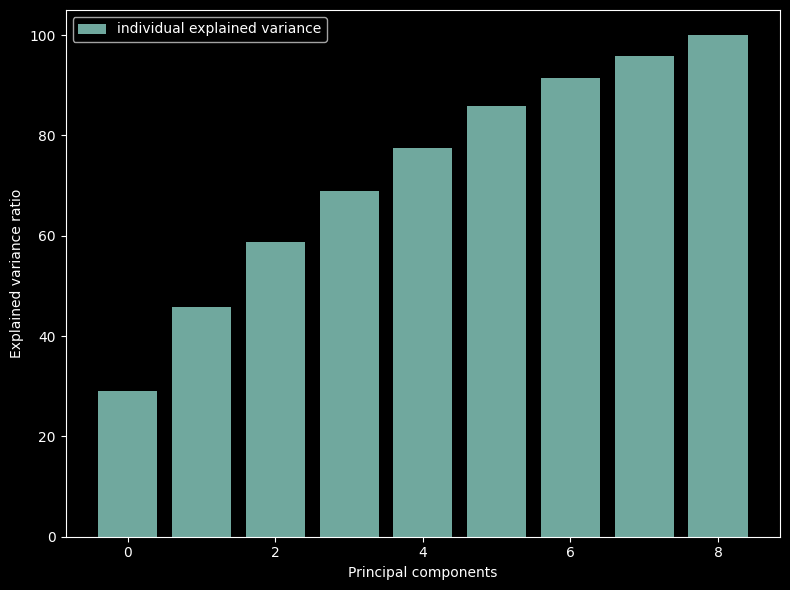

In [172]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 6))

    plt.bar(range(len(eig_vals)), cum_var_exp , alpha=0.8, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [173]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(9,1),
                      eig_pairs[1][1].reshape(9,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.26836612 -0.56877215]
 [-0.42645677  0.07729578]
 [-0.31472179 -0.19674307]
 [-0.34374698  0.28173424]
 [-0.28255867  0.22669359]
 [-0.36694802  0.37515928]
 [-0.16041272  0.27200121]
 [-0.33786915 -0.53305112]
 [-0.41776117  0.04667927]]


In [174]:
# SVD
scaler = StandardScaler()
X_standardized = scaler.fit_transform(df)

In [175]:
# Apply Singular Value Decomposition (SVD)
U, Sigma, VT = np.linalg.svd(X_standardized, full_matrices=False)

In [176]:
# Determine the number of components to retain (e.g., based on explained variance)
total_variance = np.sum(Sigma**2)
explained_variance = np.cumsum(Sigma**2) / total_variance

In [177]:
# Set a threshold for explained variance (e.g., 95%)
threshold = 0.95
num_components = np.argmax(explained_variance >= threshold) + 1

In [178]:
# Reduce dimensionality using the selected number of components
Uk = U[:, :num_components]
Sk = np.diag(Sigma[:num_components])
VKt = VT[:num_components, :]

In [179]:
# Reconstruct the data with reduced dimensionality
X_reduced = np.dot(Uk, np.dot(Sk, VKt))

In [180]:
# Display the results
print("Original data shape:", X.shape)
print("Reduced data shape:", X_reduced.shape)
print("Number of retained components:", num_components)

Original data shape: (768, 9)
Reduced data shape: (768, 9)
Number of retained components: 8


# Model

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

In [182]:
X = df.drop(columns = 'Outcome')
target = df['Outcome']

X_train , X_test , y_train , y_test = train_test_split(X ,target ,test_size=0.2 , random_state=42 )
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (614, 8)
y_train shape: (614,)
X_test shape: (154, 8)
y_test shape: (154,)


# Random Forest

In [183]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

In [184]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [185]:
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Other evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154


Confusion Matrix:
[[79 20]
 [18 37]]


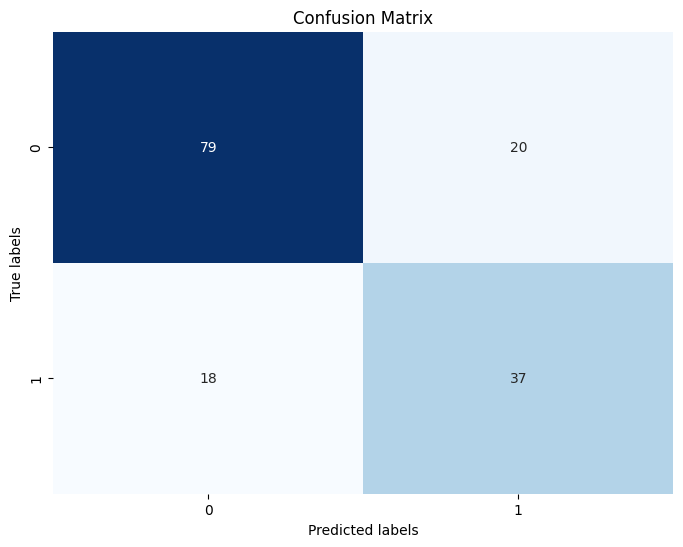

In [186]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Naive Bayes

In [187]:
naive_bayes = GaussianNB()

In [188]:
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [189]:
y_predNB = naive_bayes.predict(X_test)

In [190]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_predNB)
print(f"Accuracy of Gaussian Naive Bayes: {accuracy:.2f}")

# Get classification report
print("\nClassification Report:")
print(classification_report(y_test, y_predNB))

Accuracy of Gaussian Naive Bayes: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [191]:
# Get training and testing accuracy
train_accuracy = naive_bayes.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, y_predNB)

In [192]:
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")


Training Accuracy: 0.75
Testing Accuracy: 0.75


In [193]:
accuracy_diff = train_accuracy - test_accuracy

if accuracy_diff > 0.1:  # You can adjust this threshold based on your context
    print("The model may be overfitting.")
elif accuracy_diff < -0.1:  # You can adjust this threshold based on your context
    print("The model may be underfitting.")
else:
    print("The model seems to have a balanced fit.")

The model seems to have a balanced fit.


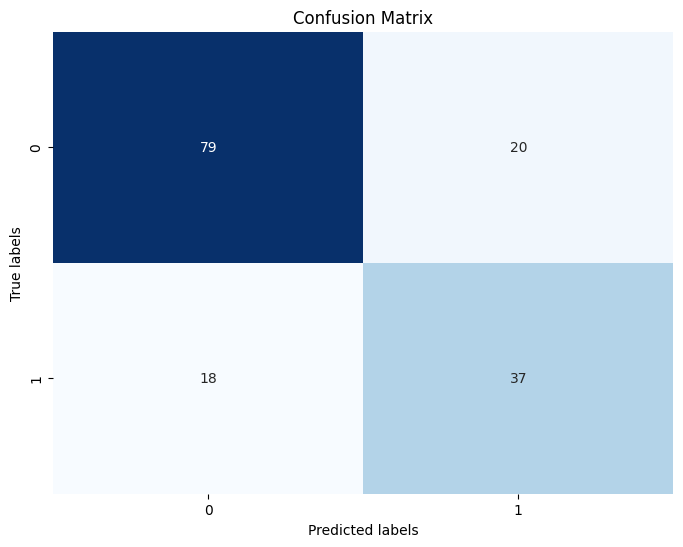

In [194]:
conf_matrix = confusion_matrix(y_test, y_predNB)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [195]:
from sklearn.metrics import roc_curve, roc_auc_score

In [196]:
# Fit the Gaussian Naive Bayes model and predict probabilities
naive_bayes.fit(X_train, y_train)
y_probs = naive_bayes.predict_proba(X_test)[:, 1]  # Probability of the positive class

In [197]:
# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

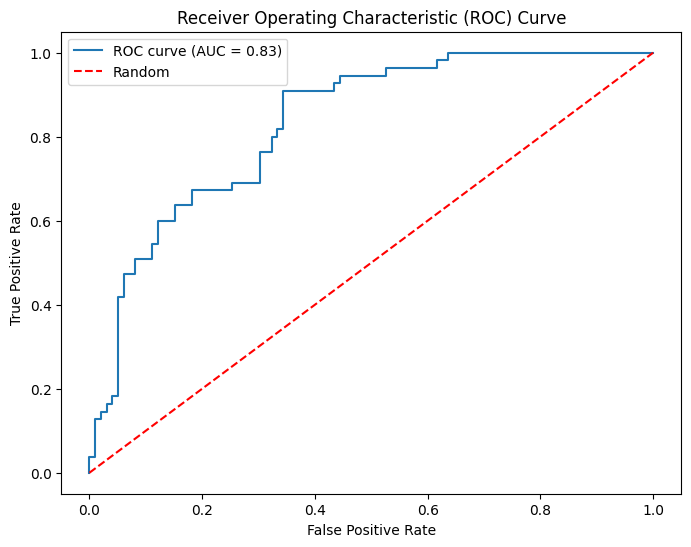

In [198]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_probs)))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Bayesian Belief Network

In [199]:
pip install pgmpy

In [200]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator

In [201]:
# Initialize the Bayesian Network
model2 = BayesianNetwork()

# Add nodes and edges to the network
model2.add_nodes_from(['Pregnancies', 'Glucose', 'Outcome'])  # Add nodes
model2.add_edges_from([('Pregnancies', 'Outcome'), ('Glucose', 'Outcome')])  # Add edges

In [202]:
model2.fit(df)

In [203]:
print("Bayesian Network structure:")
print(model2.edges())

Bayesian Network structure:
[('Pregnancies', 'Outcome'), ('Glucose', 'Outcome')]


# Decision Tree

In [204]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [205]:
decision_tree = DecisionTreeClassifier(random_state=42)

In [206]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [207]:
y_pred3 = decision_tree.predict(X_test)# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred3)
print(f"Accuracy of Decision Tree: {accuracy:.2f}")

# Get classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred3))

Accuracy of Decision Tree: 0.72

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        99
           1       0.60      0.64      0.62        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



In [208]:
# Get training and testing accuracy
train_accuracy = naive_bayes.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, y_pred3)

In [209]:
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.75
Testing Accuracy: 0.72


In [210]:
accuracy_diff = train_accuracy - test_accuracy

if accuracy_diff > 0.1:  # You can adjust this threshold based on your context
    print("The model may be overfitting.")
elif accuracy_diff < -0.1:  # You can adjust this threshold based on your context
    print("The model may be underfitting.")
else:
    print("The model seems to have a balanced fit.")

The model seems to have a balanced fit.


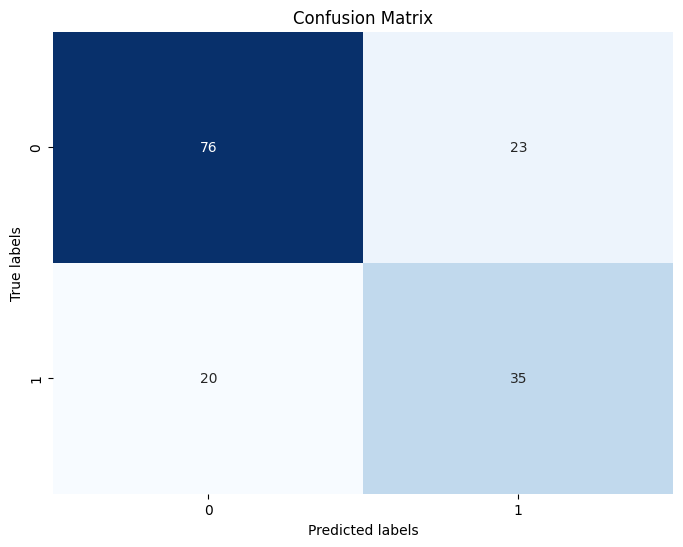

In [211]:
conf_matrix = confusion_matrix(y_test, y_pred3)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [212]:
# Calculate predicted probabilities for class 1
y_pred_prob = decision_tree.predict_proba(X_test)[:, 1]

In [213]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [214]:
# Calculate AUC score
auc = roc_auc_score(y_test, y_pred_prob)

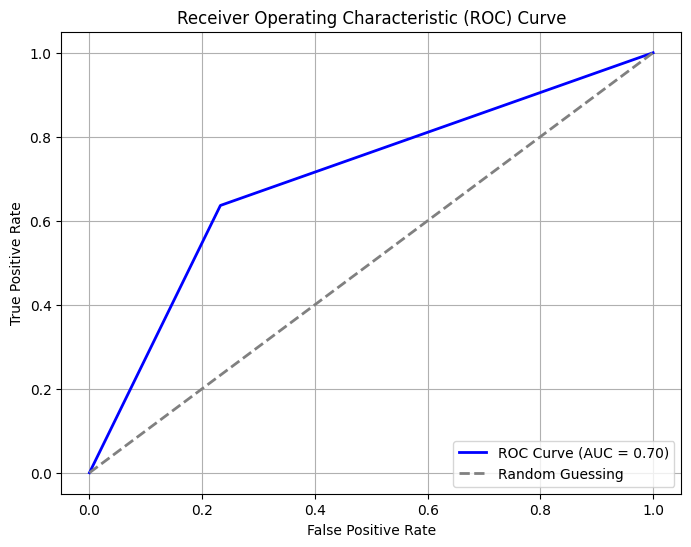

In [215]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# PCA Model

In [216]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [217]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [218]:
pca = PCA(n_components=5)

In [219]:
X_train_pca = pca.fit_transform(X_train_scaled)

In [220]:
X_test_pca = pca.transform(X_test_scaled)

In [221]:
from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier(n_neighbors=5)

In [222]:
knn2.fit(X_train_pca, y_train)

KNeighborsClassifier()

In [223]:
# Predict on the test set
y_pred4 = knn2.predict(X_test_pca)

In [224]:
accuracy = accuracy_score(y_test, y_pred4)
print(f"Accuracy with PCA: {accuracy:.2f}")

# Get classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred4))

Accuracy with PCA: 0.67

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.71      0.73        99
           1       0.53      0.60      0.56        55

    accuracy                           0.67       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.68      0.67      0.67       154



In [225]:
# Get training and testing accuracy
train_accuracy = naive_bayes.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, y_pred4)

In [226]:
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")


Training Accuracy: 0.75
Testing Accuracy: 0.67


In [227]:
accuracy_diff = train_accuracy - test_accuracy

if accuracy_diff > 0.1:  # You can adjust this threshold based on your context
    print("The model may be overfitting.")
elif accuracy_diff < -0.1:  # You can adjust this threshold based on your context
    print("The model may be underfitting.")
else:
    print("The model seems to have a balanced fit.")

The model seems to have a balanced fit.


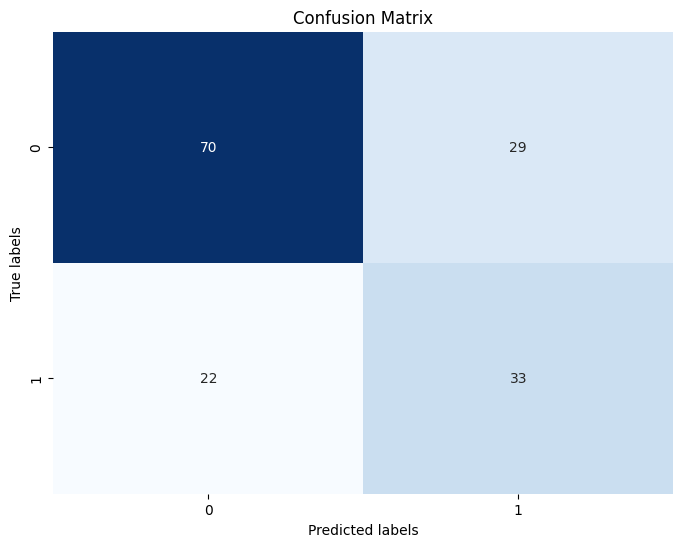

In [228]:
conf_matrix = confusion_matrix(y_test, y_pred4)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [229]:
# Initialize PCA and fit on X_train
pca = PCA(n_components=5)  # Replace 'desired_num_components' with your desired number of components
pca.fit(X_train)

# Transform both X_train and X_test using the fitted PCA
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [230]:
# Calculate predicted probabilities for class 1
y_pred_prob_knn = knn2.predict_proba(X_test_pca)[:, 1]

In [231]:
# Calculate ROC curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_prob_knn)

In [232]:
# Calculate AUC score
auc_knn = roc_auc_score(y_test, y_pred_prob_knn)

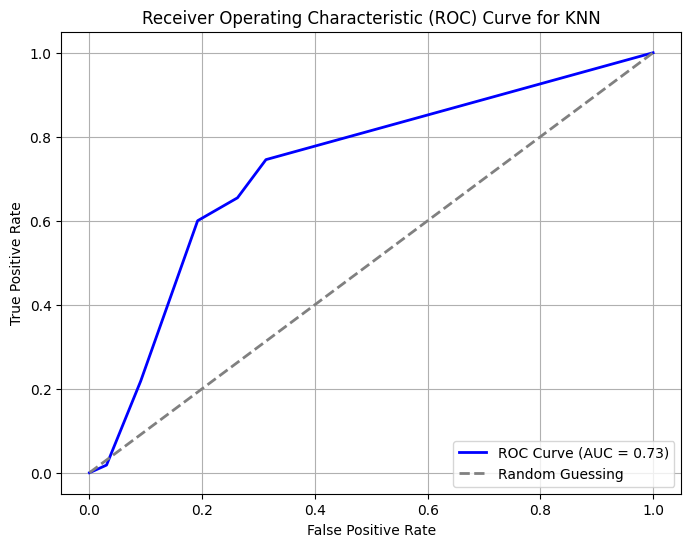

In [233]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'ROC Curve (AUC = {auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# LDA Model

In [234]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [235]:
#lda model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [236]:
# Apply LDA to reduce the dimensionality
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)# Train the classifier on the reduced dataset
knn3.fit(X_train_lda, y_train)

KNeighborsClassifier()

In [237]:
knn3 = KNeighborsClassifier(n_neighbors=5)

In [238]:
# Train the classifier on the reduced dataset
knn3.fit(X_train_lda, y_train)

KNeighborsClassifier()

In [239]:
# Predict on the test set
y_pred5 = knn3.predict(X_test_lda)

In [240]:
accuracy = accuracy_score(y_test, y_pred5)
print(f"Accuracy with LDA: {accuracy:.2f}")

# Get classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred5))

print("\nClassification Report for LDA:")
print(classification_report(y_test, y_pred5))

Accuracy with LDA: 0.71

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        99
           1       0.60      0.60      0.60        55

    accuracy                           0.71       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.71      0.71      0.71       154


Classification Report for LDA:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        99
           1       0.60      0.60      0.60        55

    accuracy                           0.71       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.71      0.71      0.71       154



In [241]:
# Get training and testing accuracy
train_accuracy = naive_bayes.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, y_pred5)

In [242]:
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.75
Testing Accuracy: 0.71


In [243]:
accuracy_diff = train_accuracy - test_accuracy

if accuracy_diff > 0.1:  # You can adjust this threshold based on your context
    print("The model may be overfitting.")
elif accuracy_diff < -0.1:  # You can adjust this threshold based on your context
    print("The model may be underfitting.")
else:
    print("The model seems to have a balanced fit.")

The model seems to have a balanced fit.


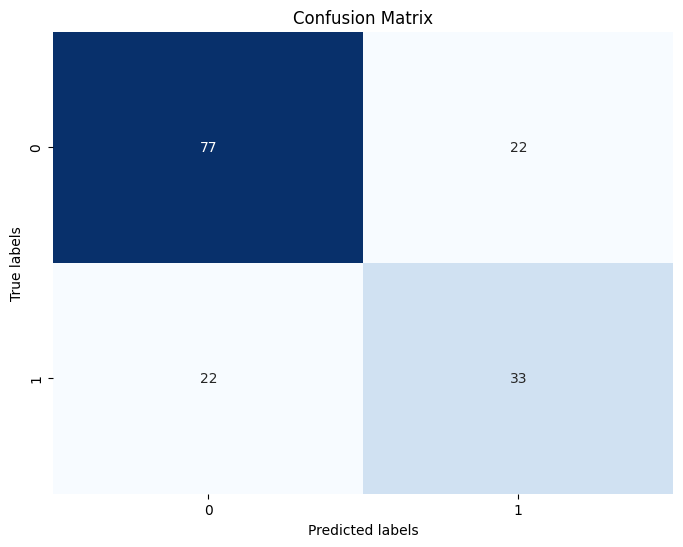

In [244]:
conf_matrix = confusion_matrix(y_test, y_pred5)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

accuracy of LDA is better than that in PCA

# Neural Network

In [245]:
import keras
from keras.models import Sequential # intitialize the ANN
from keras.layers import Dense      # create layers

In [246]:
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']  # Target variable

In [247]:
# Add dummy zero-padding to match the expected input shape
extra_features = np.zeros((X.shape[0], 17 - X.shape[1]))  # Creating zeros for extra features
X_padded = np.concatenate((X, extra_features), axis=1)

In [248]:
# Split the padded data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

In [249]:
# Create a Sequential model
model = Sequential()

In [250]:
# Add the input layer with the expected input shape of (None, 17)
model.add(Dense(32, input_shape=(17,), activation='relu'))  # Example hidden layer

In [251]:
# layers
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 17))
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [252]:
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [253]:
# Train the model
model.fit(X_train, y_train, epochs=70, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/70
20/20 [==============================] - 4s 42ms/step - loss: 0.6913 - accuracy: 0.6531 - val_loss: 0.6889 - val_accuracy: 0.6429
Epoch 2/70
20/20 [==============================] - 0s 10ms/step - loss: 0.6831 - accuracy: 0.6531 - val_loss: 0.6782 - val_accuracy: 0.6429
Epoch 3/70
20/20 [==============================] - 0s 22ms/step - loss: 0.6687 - accuracy: 0.6531 - val_loss: 0.6757 - val_accuracy: 0.6429
Epoch 4/70
20/20 [==============================] - 0s 16ms/step - loss: 0.6672 - accuracy: 0.6531 - val_loss: 0.6692 - val_accuracy: 0.6429
Epoch 5/70
20/20 [==============================] - 0s 9ms/step - loss: 0.6640 - accuracy: 0.6531 - val_loss: 0.6674 - val_accuracy: 0.6429
Epoch 6/70
20/20 [==============================] - 0s 8ms/step - loss: 0.6596 - accuracy: 0.6531 - val_loss: 0.6617 - val_accuracy: 0.6429
Epoch 7/70
20/20 [==============================] - 0s 13ms/step - loss: 0.6581 - accuracy: 0.6531 - val_loss: 0.6565 - val_accuracy: 0.6429
Epoch 8/70
20/2

In [256]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                576       
                                                                 
 dense_6 (Dense)             (None, 9)                 297       
                                                                 
 dense_7 (Dense)             (None, 9)                 90        
                                                                 
 dense_8 (Dense)             (None, 5)                 50        
                                                                 
 dense_9 (Dense)             (None, 1)                 6         
                                                                 
Total params: 1019 (3.98 KB)
Trainable params: 1019 (3.98 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [260]:
pip install pydot graphviz

In [265]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

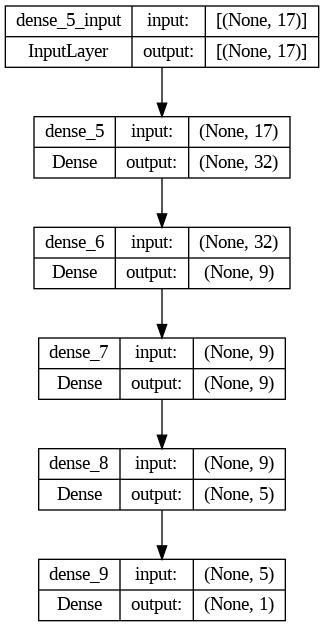

In [266]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=1)  # Manhattan distance
knn_chebyshev = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=float('inf'))  # Chebyshev distance

In [ ]:
knn_manhattan.fit(X_train_scaled, y_train)

KNeighborsClassifier(p=1)

In [ ]:
knn_chebyshev.fit(X_train_scaled, y_train)

KNeighborsClassifier(p=inf)

In [ ]:
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)
y_pred_chebyshev = knn_chebyshev.predict(X_test_scaled)

In [ ]:
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)
accuracy_chebyshev = accuracy_score(y_test, y_pred_chebyshev)

print(f"Accuracy with Manhattan distance: {accuracy_manhattan:.2f}")
print(f"Accuracy with Chebyshev distance: {accuracy_chebyshev:.2f}")

Accuracy with Manhattan distance: 0.73
Accuracy with Chebyshev distance: 0.70


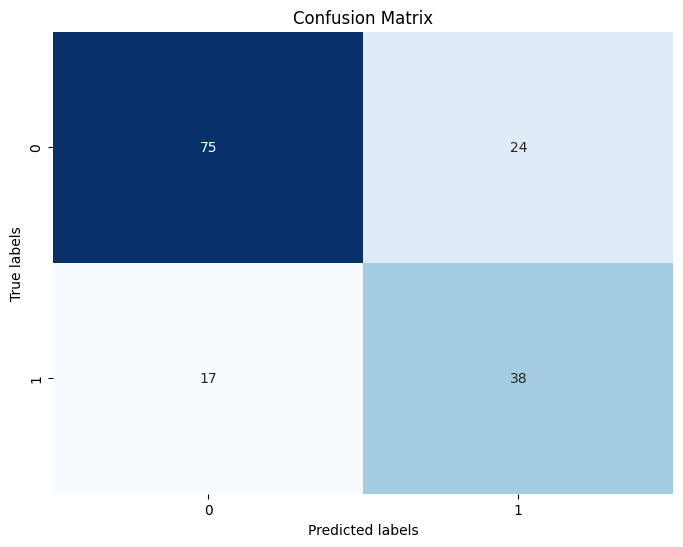

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_manhattan)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

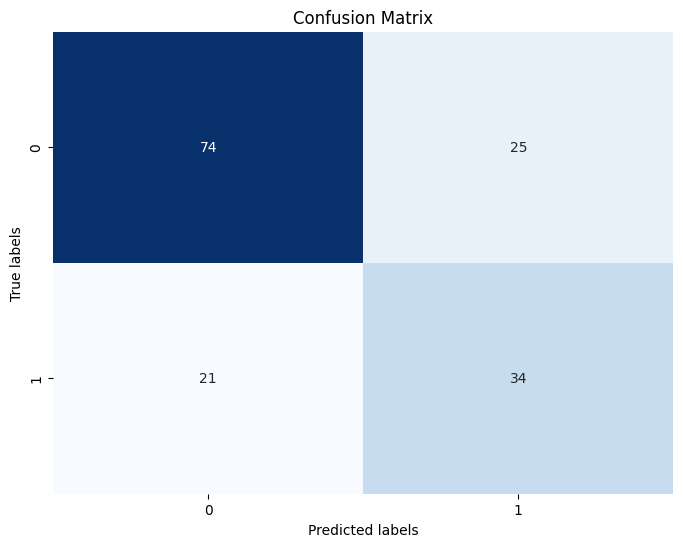

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_chebyshev)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print("\nClassification Report for Manhattan distance:")
print(classification_report(y_test, y_pred_manhattan))


Classification Report for Manhattan distance:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79        99
           1       0.61      0.69      0.65        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154



In [ ]:
print("\nClassification Report for Chebyshev distance:")
print(classification_report(y_test, y_pred_chebyshev))


Classification Report for Chebyshev distance:
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        99
           1       0.58      0.62      0.60        55

    accuracy                           0.70       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.71      0.70      0.70       154




# K-fold cross-validation

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']  # Target variable

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Define the number of folds for cross-validation
k_fold = 10

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
kfold = StratifiedKFold(n_splits=k_fold, shuffle=True, random_state=42)

In [ ]:
results = []
for train_idx, test_idx in kfold.split(X_scaled, y):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Fit the model
    knn.fit(X_train, y_train)

    # Predict on the test set
    y_pred = knn.predict(X_test)

    # Calculate accuracy for this fold
    accuracy = accuracy_score(y_test, y_pred)
    results.append(accuracy)

In [ ]:
print("Individual fold scores:", results)
print(f"Average accuracy: {sum(results) / len(results):.4f}")

Individual fold scores: [0.7402597402597403, 0.7402597402597403, 0.6753246753246753, 0.8831168831168831, 0.7142857142857143, 0.8311688311688312, 0.7142857142857143, 0.7792207792207793, 0.7368421052631579, 0.631578947368421]
Average accuracy: 0.7446


In [ ]:
# Get classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nClassification Report for LDA:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.74      0.73        50
           1       0.46      0.42      0.44        26

    accuracy                           0.63        76
   macro avg       0.58      0.58      0.58        76
weighted avg       0.62      0.63      0.63        76


Classification Report for LDA:
              precision    recall  f1-score   support

           0       0.71      0.74      0.73        50
           1       0.46      0.42      0.44        26

    accuracy                           0.63        76
   macro avg       0.58      0.58      0.58        76
weighted avg       0.62      0.63      0.63        76



In [ ]:
# Get training and testing accuracy
train_accuracy = naive_bayes.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.65
Testing Accuracy: 0.63


In [ ]:
accuracy_diff = train_accuracy - test_accuracy

if accuracy_diff > 0.1:  # You can adjust this threshold based on your context
    print("The model may be overfitting.")
elif accuracy_diff < -0.1:  # You can adjust this threshold based on your context
    print("The model may be underfitting.")
else:
    print("The model seems to have a balanced fit.")

The model seems to have a balanced fit.


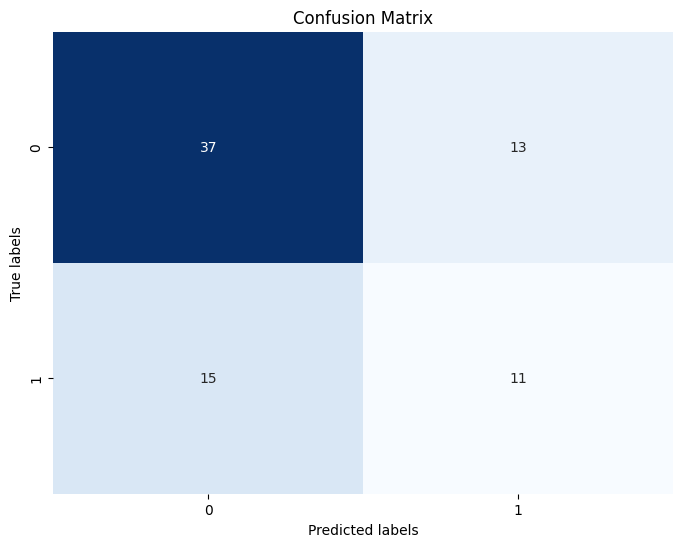

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()